### Important Links for Affinity Propagation Clustering
1. [Algorithms breakdown ](https://www.ritchievink.com/blog/2018/05/18/algorithm-breakdown-affinity-propagation/)
2. [Affinity Propagation Clustering](https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8)



### Responsibility matrix
$$
    R_{i,k} = S_{i,k} - \max_{k' \neq k} \left( S_{i,k'} + A_{i,k'} \right)
$$
where $s_{i,k}$ is the similarity between points $i$ and $k$ and $a_{i,k}$ is the availability of point $i$ to be exemplar of cluster $k$.

### Availability matrix
This have two cases:
1. If $i$ equals $k$:
$$
    A_{i,k} = \sum_{i' \neq k} \max \left( 0, R_{i',k} \right)
$$

2. If $i$ not equals $k$:
$$
    A_{i,k} = \min \left( 0, R_{k,k} + \sum_{i' \notin \{i,k\}} \max \left( 0, R_{i',k} \right) \right)
$$

### Final updation formula for responsibility and availability matrix (Damping Factor) :
Computing responsibilities and availabilities according to simple update rules will often lead to oscillations caused by ```overshooting``` the solution, so the responsibility and availability messages are ```damped``` by a factor $\lambda$ in each iteration. The damping factor $\lambda$ is used to avoid the oscillation of the algorithm. The algorithm will be more stable if we use a damping factor $\lambda$ between 0.5 and 1.0. The default value of $\lambda$ is 0.5.

$$
    A_{i,k}^{(curr)} = \lambda A_{i,k}^{(prev)} + (1-\lambda) A_{i,k}^{(curr')}
$$
$$
    R_{i,k}^{(curr)} = \lambda R_{i,k}^{(prev)} + (1-\lambda) R_{i,k}^{(curr')}
$$

Where,
1. $\lambda$ is the damping factor.
2. $A_{i,k}^{(prev)}$ is the availability of point $i$ to be exemplar of cluster $k$ in the previous iteration.
3. $R_{i,k}^{(prev)}$ is the responsibility of point $i$ to be exemplar of cluster $k$ in the previous iteration.
4. $A_{i,k}^{(curr)}$ is the availability of point $i$ to be exemplar of cluster $k$ in the current iteration.
5. $R_{i,k}^{(curr)}$ is the responsibility of point $i$ to be exemplar of cluster $k$ in the current iteration.
6. $A_{i,k}^{(curr')}$ is the availability of point $i$ to be exemplar of cluster $k$ in the current iteration according to the simple update rules.
7. $R_{i,k}^{(curr')}$ is the responsibility of point $i$ to be exemplar of cluster $k$ in the current iteration according to the simple update rules.


### Algorithm for Affinity Propagation Clustering (APC):
- Initialize $S_{i,k}$ to the similarity between points $i$ and $k$.
- Initialize $A_{i,k}$ and $R_{i,k}$ to 0.
- Repeat until convergence:
    - Update $A_{i,k}$ using the formula above.
    - Update $R_{i,k}$ using the formula above.
- Then we get a criterion matrix $R_{i,k} + A_{i,k}$, where the maximum value in each row is the exemplar of the cluster.
- The rows with same exemplar are in the same cluster.

### What is the best example that can show us ossilation of the algorithm?
The best example is when we have a dataset with only two points . In this case, the algorithm will oscillate between two clusters.

### Convergence:
The algorithm will converge when the number of clusters will not change anymore.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


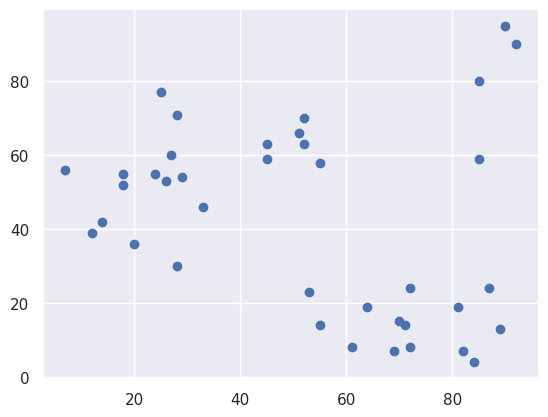

In [2]:
dict = {
    'x':[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72,25, 28, 14, 18, 7, 27, 26, 85, 71, 70, 72, 81, 82, 87, 84, 89, 85, 92, 90],
    'y':[39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 77, 71, 42, 55, 56, 60, 53, 59, 14, 15, 8, 19, 7, 24, 4, 13, 80, 90, 95]
}

df = pd.DataFrame(dict, columns=['x', 'y'])
print(type(df))
data = df.values
print(type(data))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [1]:
class Affinity:
    def __init__(self, data, preference=-50, max_iter=200, convergence_iter=15, damping=0.5):
        self.data = data
        self.preference = preference
        self.max_iter = max_iter
        self.convergence_iter = convergence_iter
        self.damping = damping
        
    def fit(self):
        self.n_samples = self.data.shape[0]
        # Similarity Matrix
        self.similarity = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(i, self.n_samples):
                if i == j:
                    self.similarity[i, j] = self.preference
                else:
                    self.similarity[i, j] = -np.square(np.linalg.norm(self.data[i] - self.data[j]))
                    self.similarity[j, i] = self.similarity[i, j]
                    
        # Responsibility and Availability Matrix
        self.responsibility = np.zeros((self.n_samples, self.n_samples))
        self.availability = np.zeros((self.n_samples, self.n_samples))
        self.cluster_centers_indices = None
        self.labels_ = None
        self.cluster_centers_ = None
        self.n_iter_ = 0
        self.affinity_propagation()
        
        def affinity_propagation(self):
            for self.n_iter_ in range(self.max_iter):
                # Update Responsibility
                R = self.responsibility
                A = self.availability
                S = self.similarity
                
                old_R = np.copy(R)
                for i in range(self.n_samples):
                    for j in range(self.n_samples):
                        sum = np.sum
                
                
               
